Data fields

***Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

importing dataframes

In [4]:
df1 = pd.read_csv('data/train.csv')

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df2 = pd.read_csv('data/store.csv')

combining two csv files

In [6]:
df3 = pd.merge(df1, df2)

In [7]:
df3.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,7/31/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,7/30/2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,7/29/2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,7/28/2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,7/27/2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,7/26/2015,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,7/25/2015,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,7/24/2015,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,7/23/2015,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,7/22/2015,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


Finding incorrect values

In [8]:
df3.columns[df3.isnull().any()]

Index(['CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
       'PromoInterval'],
      dtype='object')

**store**

In [9]:
df3['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

**day of week**

In [10]:
df3['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [11]:
df3[(df3['Open']==1) & (df3['DayOfWeek']==7)&(df3['Sales']>0)].shape

(3593, 18)

In [12]:
df3[(df3['Open']==1) & (df3['DayOfWeek']!=7)&(df3['Sales']>0)].shape

(840745, 18)

Sunday sales is more compared to other days

In [13]:
df3[(df3['Open']==0) & (df3['DayOfWeek']==7) & (df3['Sales']>0)].shape

(0, 18)

In [14]:
df3[(df3['Open']==0) & (df3['DayOfWeek']==7) & (df3['Sales']==0)].shape

(141137, 18)

141137 times, the stores were closed for no reason (No Holidays o Sunday)

Rossman described clearly, that they were undergoing refurbishments sometimes and had to close. 

**date**

In [15]:
df3['Date'].unique()

array(['7/31/2015', '7/30/2015', '7/29/2015', '7/28/2015', '7/27/2015',
       '7/26/2015', '7/25/2015', '7/24/2015', '7/23/2015', '7/22/2015',
       '7/21/2015', '7/20/2015', '7/19/2015', '7/18/2015', '7/17/2015',
       '7/16/2015', '7/15/2015', '7/14/2015', '7/13/2015', '7/12/2015',
       '7/11/2015', '7/10/2015', '7/9/2015', '7/8/2015', '7/7/2015',
       '7/6/2015', '7/5/2015', '7/4/2015', '7/3/2015', '7/2/2015',
       '7/1/2015', '6/30/2015', '6/29/2015', '6/28/2015', '6/27/2015',
       '6/26/2015', '6/25/2015', '6/24/2015', '6/23/2015', '6/22/2015',
       '6/21/2015', '6/20/2015', '6/19/2015', '6/18/2015', '6/17/2015',
       '6/16/2015', '6/15/2015', '6/14/2015', '6/13/2015', '6/12/2015',
       '6/11/2015', '6/10/2015', '6/9/2015', '6/8/2015', '6/7/2015',
       '6/6/2015', '6/5/2015', '6/4/2015', '6/3/2015', '6/2/2015',
       '6/1/2015', '5/31/2015', '5/30/2015', '5/29/2015', '5/28/2015',
       '5/27/2015', '5/26/2015', '5/25/2015', '5/24/2015', '5/23/2015',
       '5/

We are dealing with time series data so it will probably serve us to extract dates for further analysis. We also have two likely correlated vaiables in the dataset, which can be combined into a new feature

In [16]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [17]:
df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month
df3['Day'] = df3['Date'].dt.day
df3['dayOfWeek'] = df3['Date'].dt.day_name()
df3['WeekOfYear'] = df3['Date'].dt.weekofyear

df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,dayOfWeek,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,Friday,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,30,Thursday,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,29,Wednesday,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,28,Tuesday,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,27,Monday,31


**sales**

In [18]:
df3['Sales'].unique()

array([ 5263,  5020,  4782, ..., 20362, 18841, 21237], dtype=int64)

In [19]:
df3[df3['Sales'] == 0].shape

(172871, 23)

In [20]:
df3[(df3['Open']==1) & (df3['Sales']==0)].shape

(54, 23)

There are 54 stores opened with 0 sales

In [21]:
df3[(df3['Sales'] == 0) & (df3['Customers'] >0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,dayOfWeek,WeekOfYear
864013,948,4,2013-04-25,0,5,1,1,0,0,b,...,NaN,0,NaN,NaN,NaN,2013,4,25,Thursday,17
1003331,1100,2,2014-04-29,0,3,1,1,0,0,a,...,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2014,4,29,Tuesday,18


In [22]:
df3.drop(df3.index[[864013,1003331]], inplace=True)

In Two stores customers are available but the sales is zero 
we know that missing data so droping those two rows

**customers**

In [23]:
df3['Customers'].unique()

array([ 555,  546,  523, ..., 3727, 4022, 4106], dtype=int64)

In [24]:
df3[df3['Customers'] == 0].shape

(172869, 23)

**open**

In [25]:
df3['Open'].unique()

array([1, 0], dtype=int64)

In [26]:
df3[df3['Open'] == 0].shape

(172817, 23)

In [27]:
df3[(df3['Customers'] >= 1) & (df3['Open'] == 0)].shape

(0, 23)

**promo**

In [28]:
df3['Promo'].unique()

array([1, 0], dtype=int64)

In [29]:
df3[(df3['Promo'] == 1)].shape

(388078, 23)

In [30]:
df3[(df3['Sales'] == 0) & (df3['Promo'] == 1)].shape

(11203, 23)

In [31]:
df3[(df3['Sales'] == 0) & (df3['Promo'] == 0)].shape

(161666, 23)

In [32]:
df3[(df3['Open'] == 0) & (df3['Promo'] == 1)].shape

(11184, 23)

**state holiday**

In [33]:
df3['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [34]:
df3.loc[df3['StateHoliday'] == '0', 'StateHoliday'] = 0

 In state holiday there is string o this is replaced by 0

**School holiday**

In [35]:
df3['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

**storetype**

In [36]:
df3['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

**assortment**

In [37]:
df3['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

**Competition Distance**

In [38]:
df3['CompetitionDistance'].unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

**CompetitionOpenSinceMonth**

In [39]:
df3['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

**CompetitionOpenSinceYear**

In [40]:
df3['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

**Promo2**

In [41]:
df3['Promo2'].unique()

array([0, 1], dtype=int64)

**Promo2SinceWeek**

In [42]:
df3['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

**Promo2SinceWeek**

In [43]:
df3['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

**PromoInterval**

In [44]:
df3['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [45]:
df3['CompetitionDistance'].fillna(0, inplace = True)

Cleaning the data and replacing nan to 0.And also comparing values and taking mode function and replacing

In [46]:
df3[(df3['CompetitionDistance'] > 0) & (df3['CompetitionOpenSinceMonth'].isnull())].shape

(320704, 23)

In [47]:
df3['CompetitionOpenSinceMonth'].mode()

0    9.0
dtype: float64

In [48]:
df3.loc[(df3['CompetitionDistance'] > 0) & (df3['CompetitionOpenSinceMonth'].isnull()), 'CompetitionOpenSinceMonth'] = 9.0

In [49]:
df3[(df3['CompetitionDistance'] > 0) & (df3['CompetitionOpenSinceYear'].isnull())].shape

(320704, 23)

In [50]:
df3['CompetitionOpenSinceYear'].mode()

0    2013.0
dtype: float64

In [51]:
df3.loc[(df3['CompetitionDistance'] > 0) & (df3['CompetitionOpenSinceYear'].isnull()), 'CompetitionOpenSinceYear'] = 2013.0

In [52]:
df3[(df3['CompetitionDistance'] > 0) & (df3['CompetitionOpenSinceYear'].isnull())].shape

(0, 23)

**promo2**

In [53]:
df3[(df3['Promo2']==0)].shape

(508030, 23)

In [54]:
df3[(df3['Promo2SinceWeek'].isnull())].shape

(508030, 23)

In [55]:
df3[(df3['Promo2SinceYear'].isnull())].shape

(508030, 23)

In [56]:
df3[(df3['PromoInterval'].isnull())].shape

(508030, 23)

508030 promo2 is zero

Promo2SinceWeek,Promo2SinceYear,PromoInterval total Nan is 508030 .we have no problem

In [57]:
df3[(df3['Promo2'] == 1) & (df3['Promo2SinceWeek'].isnull())].shape

(0, 23)

In [58]:
df3[(df3['Promo2'] == 1) & (df3['Promo2SinceYear'].isnull())].shape

(0, 23)

In [59]:
df3[(df3['Promo2'] == 1) & (df3['PromoInterval'].isnull())].shape

(0, 23)

checking if promo2 is 1 the Promo2SinceWeek,Promo2SinceYear,PromoInterval in which Nan is available or not.There is no null value

To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:

**CompetitionOpen**

In [60]:
df3['CompetitionOpen'] = 12 * (df3.Year - df3.CompetitionOpenSinceYear) + (df3.Month - df3.CompetitionOpenSinceMonth)
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,dayOfWeek,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,Friday,31,82.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,30,Thursday,31,82.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,29,Wednesday,31,82.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,28,Tuesday,31,82.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,27,Monday,31,82.0


In [61]:
df3[(df3['CompetitionOpen'].isnull())].shape

(2642, 24)

In [62]:
df3[(df3['CompetitionOpen']==0)].shape

(16035, 24)

In [63]:
df3[(df3['CompetitionOpen']>0)].shape

(828572, 24)

In [64]:
df3[(df3['CompetitionOpen']<0)].shape

(169958, 24)

In [65]:
df3[(df3['CompetitionOpen']<0)].CompetitionOpen.unique()

array([ -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10., -11.,
       -12., -13., -14., -15., -16., -17., -18., -19., -20., -21., -22.,
       -23., -24., -25., -26., -27., -28., -29., -30., -31.])

In [66]:
df3.loc[(df3['CompetitionOpen'].isnull()), 'CompetitionOpen'] = -15

we analysed that postive ,zero value have CompetitionOpen and negative , NaN value have not CompetitionOpen

**promo**

In [67]:
df3['PromoOpen'] = 12 * (df3.Year - df3.Promo2SinceYear) + (df3.WeekOfYear - df3.Promo2SinceWeek) / 4.0

In [68]:
df3[(df3['PromoOpen'].isnull())].shape

(508030, 25)

In [69]:
df3[(df3['PromoOpen']==0)].shape

(1273, 25)

In [70]:
df3[(df3['PromoOpen']>0)].shape

(438018, 25)

In [71]:
df3[(df3['PromoOpen']<0)].shape

(69886, 25)

In [72]:
df3[(df3['PromoOpen']<0)].PromoOpen.unique()

array([ -3.25,  -3.5 ,  -3.75,  -4.  ,  -4.25,  -4.5 ,  -4.75,  -5.  ,
        -5.25,  -5.5 ,  -5.75,  -6.  ,  -6.25,  -6.5 ,  -6.75,  -7.  ,
        -7.25,  -7.5 ,  -7.75,  -8.  ,  -8.25,  -8.5 ,  -8.75,  -9.  ,
        -9.25,  -9.5 ,  -9.75, -21.75, -10.  , -10.25, -10.5 , -10.75,
       -11.  , -11.25, -11.5 , -11.75, -12.  , -12.25, -12.5 , -12.75,
       -13.  , -13.25, -13.5 , -13.75, -14.  , -14.25, -14.5 , -14.75,
       -15.  , -15.25, -15.5 , -15.75, -16.  , -16.25, -16.5 , -16.75,
       -17.  , -17.25, -17.5 , -17.75, -18.  , -18.25, -18.5 , -18.75,
       -19.  , -19.25, -19.5 , -19.75, -20.  , -20.25, -20.5 , -20.75,
       -21.  , -21.25, -21.5 ,  -0.25,  -0.5 ,  -0.75,  -1.  ,  -1.25,
        -1.5 ,  -1.75,  -2.  ,  -2.25,  -2.5 ,  -2.75,  -3.  , -25.25,
       -22.  , -22.25, -22.5 , -22.75, -23.  , -23.25, -23.5 , -23.75,
       -24.  , -24.25, -24.5 , -24.75, -25.  , -27.25, -25.5 , -25.75,
       -26.  , -26.25, -26.5 , -26.75, -27.  , -29.5 , -27.5 , -27.75,
      

In [73]:
df3.loc[(df3['PromoOpen'].isnull()), 'PromoOpen'] = -15

we analysed that postive ,zero value have PromoOpen and negative , NaN value have not PromoOpen

In [74]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,dayOfWeek,WeekOfYear,CompetitionOpen,PromoOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,Friday,31,82.0,-15.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,30,Thursday,31,82.0,-15.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,29,Wednesday,31,82.0,-15.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,28,Tuesday,31,82.0,-15.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,27,Monday,31,82.0,-15.0


In [75]:
df3.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int64
Month                                 int64
Day                                   int64
dayOfWeek                            object
WeekOfYear                      

In [76]:
df3.drop(columns=['Date','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','dayOfWeek','Day'], inplace=True)

In [77]:
categorical_columns = ['Open', 'Promo','DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment','PromoInterval','Promo2','Year','Month','WeekOfYear']
numeric_columns = ['Store','Sales', 'Customers', 'CompetitionDistance','CompetitionOpen','PromoOpen']

In [78]:
df3.dtypes

Store                    int64
DayOfWeek                int64
Sales                    int64
Customers                int64
Open                     int64
Promo                    int64
StateHoliday            object
SchoolHoliday            int64
StoreType               object
Assortment              object
CompetitionDistance    float64
Promo2                   int64
PromoInterval           object
Year                     int64
Month                    int64
WeekOfYear               int64
CompetitionOpen        float64
PromoOpen              float64
dtype: object

**univariate analysis**

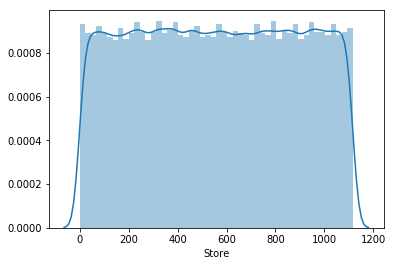

In [79]:
sns.distplot(df3['Store'])

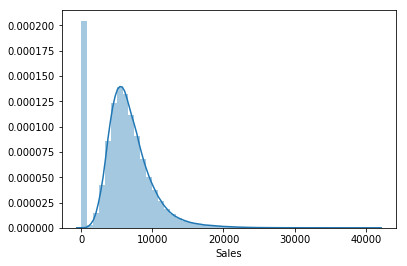

In [80]:
sns.distplot(df3['Sales'])

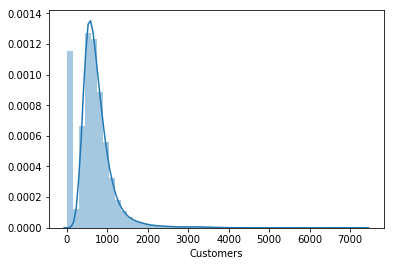

In [81]:
sns.distplot(df3['Customers'])

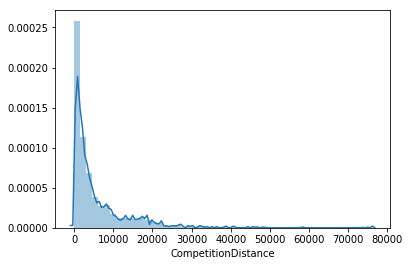

In [82]:
sns.distplot(df3['CompetitionDistance'])

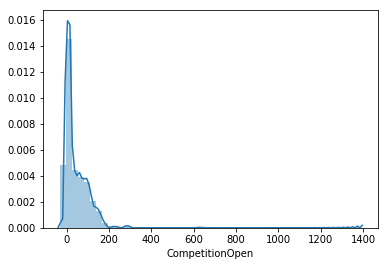

In [83]:
sns.distplot(df3['CompetitionOpen'])

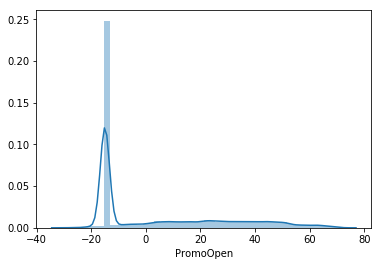

In [84]:
sns.distplot(df3['PromoOpen'])

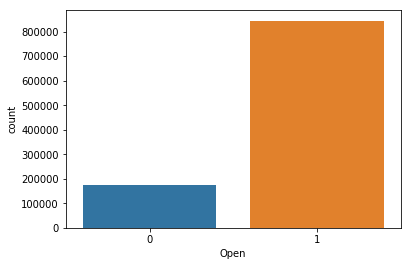

In [85]:
sns.countplot(x=df3['Open'], data=df3)

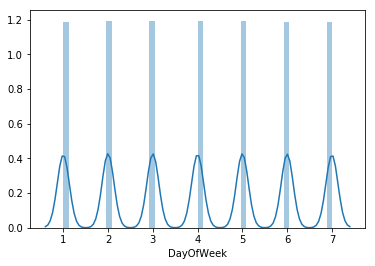

In [86]:
sns.distplot(df3['DayOfWeek'])

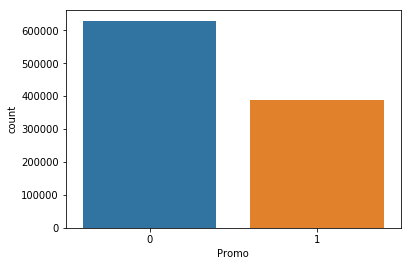

In [87]:
sns.countplot(x=df3['Promo'], data=df3)

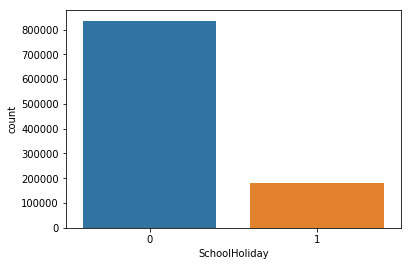

In [88]:
sns.countplot(x=df3['SchoolHoliday'], data=df3)

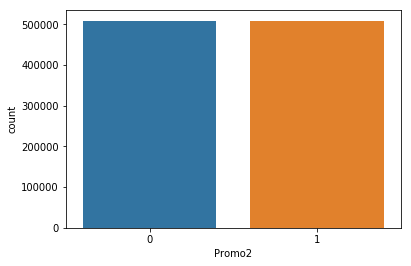

In [89]:
sns.countplot(x=df3['Promo2'], data=df3)

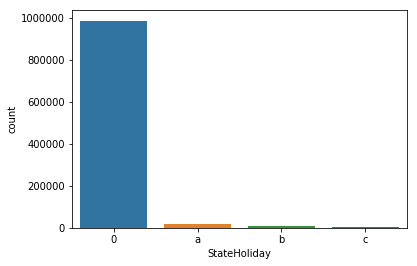

In [90]:
sns.countplot(x="StateHoliday", data=df3)

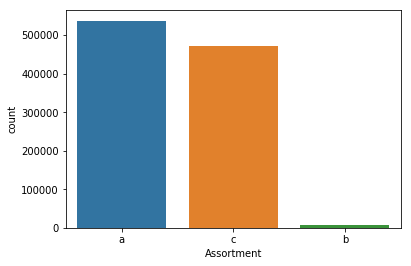

In [91]:
sns.countplot(x="Assortment", data=df3)

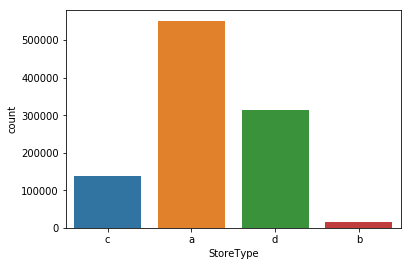

In [92]:
sns.countplot(x="StoreType", data=df3)

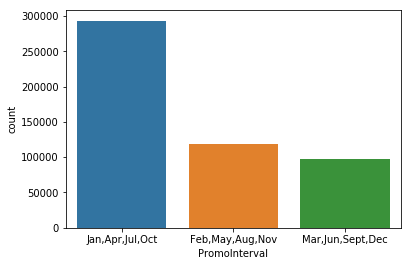

In [93]:
sns.countplot(x=df3['PromoInterval'], data=df3)

Bivariate Analysis= Target vs other features

In [94]:
categorical_columns

['Open',
 'Promo',
 'DayOfWeek',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'Promo2',
 'Year',
 'Month',
 'WeekOfYear']

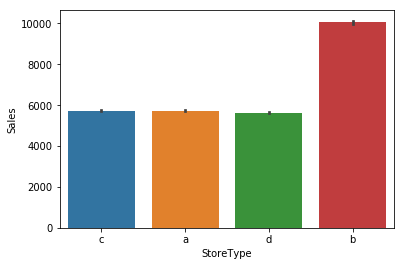

In [95]:
sns.barplot(x='StoreType', y='Sales', data=df3)

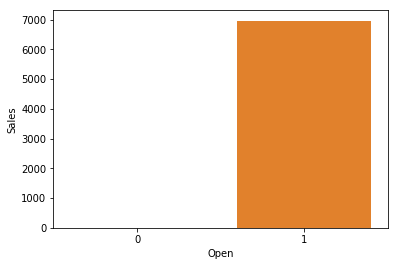

In [96]:
sns.barplot(x='Open', y='Sales', data=df3)

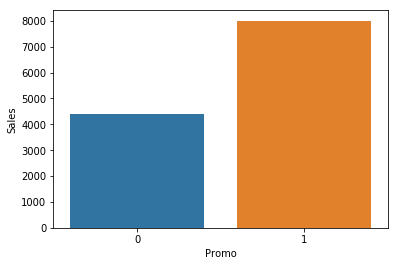

In [97]:
sns.barplot(x='Promo', y='Sales', data=df3)

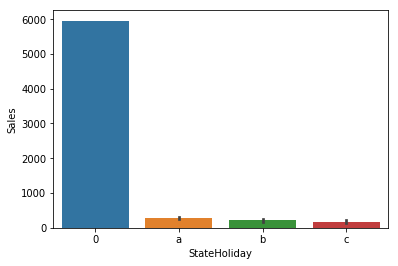

In [98]:
sns.barplot(x='StateHoliday', y='Sales', data=df3)

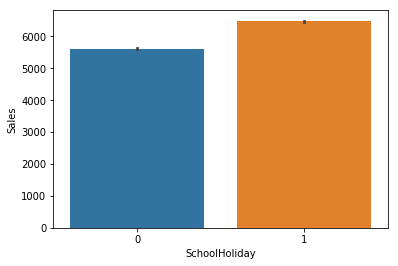

In [99]:
sns.barplot(x='SchoolHoliday', y='Sales', data=df3)

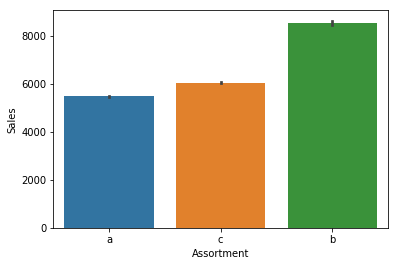

In [100]:
sns.barplot(x='Assortment', y='Sales', data=df3)

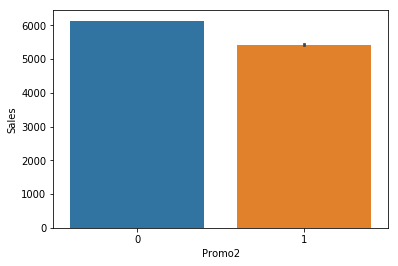

In [101]:
sns.barplot(x='Promo2', y='Sales', data=df3)

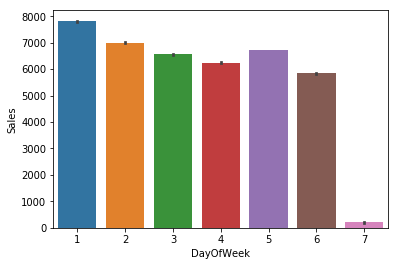

In [102]:
sns.barplot(x='DayOfWeek', y='Sales', data=df3)

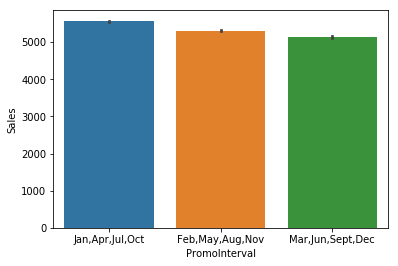

In [103]:
sns.barplot(x='PromoInterval', y='Sales', data=df3)

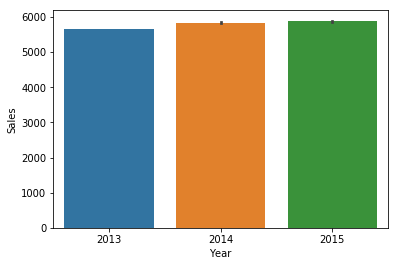

In [104]:
sns.barplot(x='Year', y='Sales', data=df3)

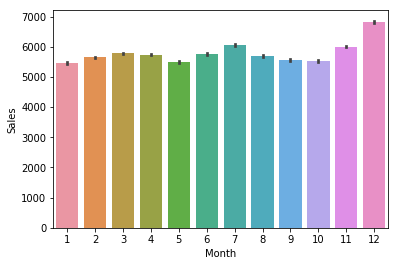

In [105]:
sns.barplot(x='Month', y='Sales', data=df3)

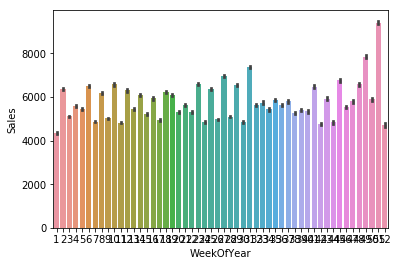

In [106]:
sns.barplot(x='WeekOfYear', y='Sales', data=df3)

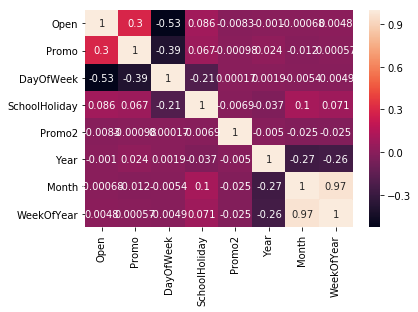

In [107]:
corr = df3[categorical_columns].corr()
sns.heatmap(corr, annot=True)

In [108]:
numeric_columns

['Store',
 'Sales',
 'Customers',
 'CompetitionDistance',
 'CompetitionOpen',
 'PromoOpen']

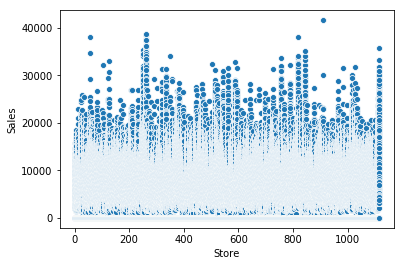

In [109]:
sns.scatterplot(x='Store',y='Sales', data=df3)

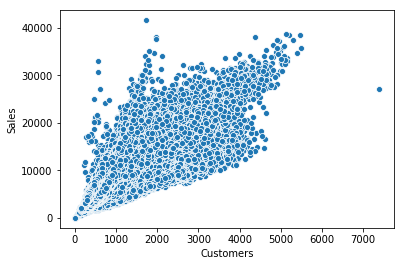

In [110]:
sns.scatterplot(x='Customers',y='Sales', data=df3)

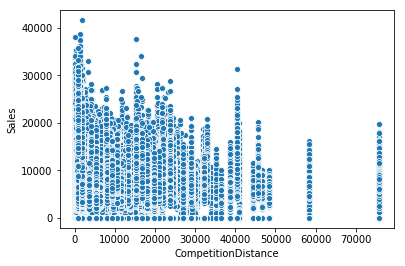

In [111]:
sns.scatterplot(x='CompetitionDistance',y='Sales', data=df3)

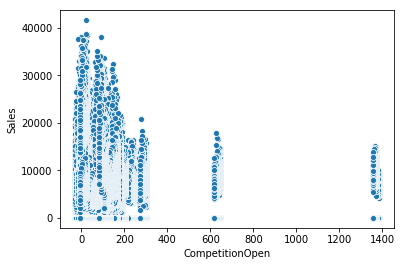

In [112]:
sns.scatterplot(x='CompetitionOpen',y='Sales', data=df3)

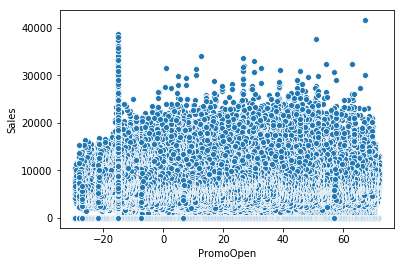

In [113]:
sns.scatterplot(x='PromoOpen',y='Sales', data=df3)

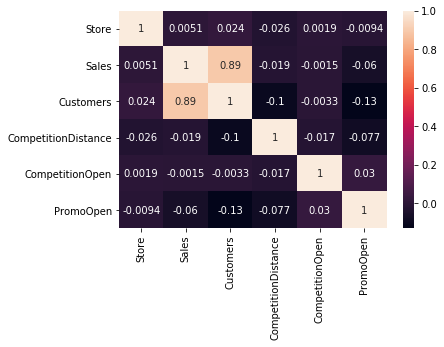

In [114]:
corr = df3[numeric_columns].corr()
sns.heatmap(corr, annot=True)

In [115]:
df3.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,WeekOfYear,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,-15.0
1,1,4,5020,546,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,-15.0
2,1,3,4782,523,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,-15.0
3,1,2,5011,560,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,-15.0
4,1,1,6102,612,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,-15.0


In [116]:
df3.dtypes

Store                    int64
DayOfWeek                int64
Sales                    int64
Customers                int64
Open                     int64
Promo                    int64
StateHoliday            object
SchoolHoliday            int64
StoreType               object
Assortment              object
CompetitionDistance    float64
Promo2                   int64
PromoInterval           object
Year                     int64
Month                    int64
WeekOfYear               int64
CompetitionOpen        float64
PromoOpen              float64
dtype: object

**Normalization**

2.9312720665226597

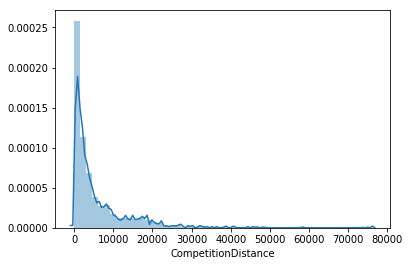

In [117]:
sns.distplot(df3['CompetitionDistance'])
df3['CompetitionDistance'].skew()

Data cleaning: Looks like CompetitionDistance is 0 Looks like we have outliers Feature Engineering: Positively skewed

0.6597444481910483

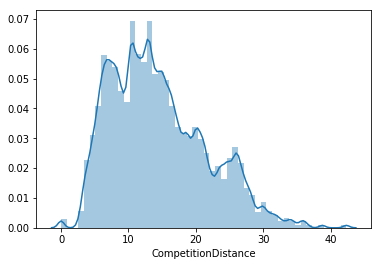

In [118]:
sns.distplot(np.cbrt(df3['CompetitionDistance']))
np.cbrt(df3['CompetitionDistance']).skew()

In [119]:
df3['CompetitionDistance']=np.cbrt(df3['CompetitionDistance'])

7.6450947233159745

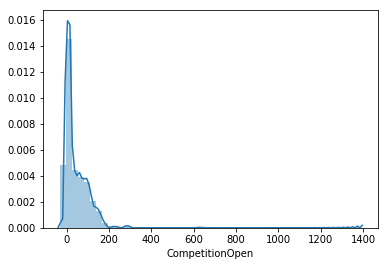

In [120]:
sns.distplot(df3['CompetitionOpen'])
df3['CompetitionOpen'].skew()

-0.7471270774140909

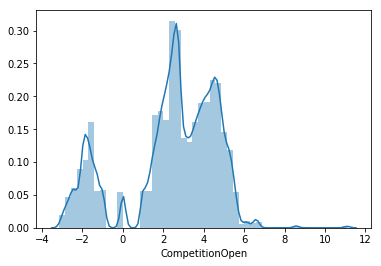

In [121]:
sns.distplot(np.cbrt(df3['CompetitionOpen']))
np.cbrt(df3['CompetitionOpen']).skew()

In [122]:
df3['CompetitionOpen']=np.cbrt(df3['CompetitionOpen'])

0.8542745138768614

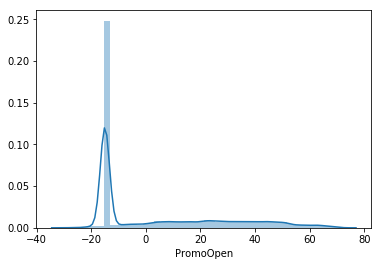

In [123]:
sns.distplot(df3['PromoOpen'])
df3['PromoOpen'].skew()

0.3524066896810164

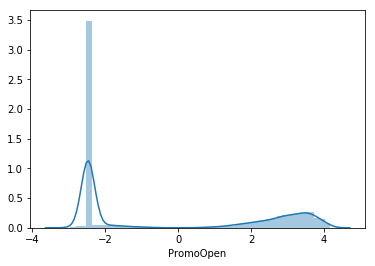

In [124]:
sns.distplot(np.cbrt(df3['PromoOpen']))
np.cbrt(df3['PromoOpen']).skew()

In [125]:
df3['PromoOpen']=np.cbrt(df3['PromoOpen'])

**Data Encoding**

In [126]:
df3.loc[df3['Assortment']=='a', 'Assortment'] = 1
df3.loc[df3['Assortment']=='b', 'Assortment'] = 2
df3.loc[df3['Assortment']=='c', 'Assortment'] = 3

In [127]:
df3.loc[df3['StateHoliday']=='a', 'StateHoliday'] = 1
df3.loc[df3['StateHoliday']=='b', 'StateHoliday'] = 1
df3.loc[df3['StateHoliday']=='c', 'StateHoliday'] = 1

In [128]:
df3['PromoInterval'] = df3['PromoInterval'].map({np.nan: '0', 'Jan,Apr,Jul,Oct': '1', 'Feb,May,Aug,Nov':'2', 'Mar,Jun,Sept,Dec':'3' })

One-hot Encoding

In [129]:
df3=pd.get_dummies(df3, columns=['StoreType']) 

In [130]:
df3.columns[df3.isnull().any()]

Index([], dtype='object')

In [131]:
df3.drop(columns=['Customers','Store'], inplace=True)

we create two variable trainwithsales and trainwithoutsales

In [132]:
WithSales = df3[df3['Sales'] != 0]

In [133]:
WithoutSales = df3[df3['Sales'] == 0]

Create feature for LogisticRegression problem

In [134]:
df3['Hassales']=np.where(df3['Sales']>0,1,0)
df3.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,WeekOfYear,CompetitionOpen,PromoOpen,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Hassales
0,5,5263,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0,1
1,4,5020,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0,1
2,3,4782,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0,1
3,2,5011,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0,1
4,1,6102,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0,1


In [135]:
sales=df3['Sales'].copy()
hassales=df3['Hassales'].copy()
df3.drop(columns=['Sales','Hassales'],inplace=True)
df3.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,WeekOfYear,CompetitionOpen,PromoOpen,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,5,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0
1,4,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0
2,3,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0
3,2,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0
4,1,1,1,0,1,1,10.829321,0,0,2015,7,31,4.344481,-2.466212,0,0,1,0


In [136]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
logreg= LogisticRegression()
score=cross_val_score(logreg,df3,hassales,cv=5)
print('Accuracy:', score.mean())

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Accuracy: 0.9999252854394358


In [137]:
logreg.fit(df3,hassales)
logreg.score(df3,hassales)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.999948879628237

In [138]:
WithSales.shape

(844338, 19)

In [139]:
WithoutSales.shape

(172869, 19)

-0.10968460576537623

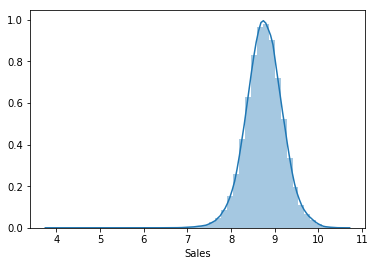

In [140]:
sns.distplot(np.log(WithSales['Sales']))
np.log(WithSales['Sales']).skew()

Random Forest Regressor

In [141]:
targets = np.log(WithSales['Sales'])
WithSales.drop(columns=['Sales'], inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [142]:
from sklearn.model_selection import train_test_split
X_WithSales, X_test, y_WithSales, y_test =train_test_split(WithSales, targets, test_size=0.3)
print(X_WithSales.shape)
print(X_test.shape)

(591036, 18)
(253302, 18)


In [143]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=15, random_state=0)
regressor.fit(X_WithSales, y_WithSales)
from sklearn.metrics import mean_squared_error
train_pred = regressor.predict(X_WithSales)
mean_squared_error(y_WithSales, train_pred)

0.0038055794085846586

In [144]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.021555007921676948

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 6 (0.377566)
2. feature 2 (0.164528)
3. feature 12 (0.123792)
4. feature 0 (0.074679)
5. feature 13 (0.054182)
6. feature 11 (0.050259)
7. feature 8 (0.024587)
8. feature 5 (0.021755)
9. feature 14 (0.020671)
10. feature 10 (0.017870)
11. feature 15 (0.016058)
12. feature 17 (0.014908)
13. feature 16 (0.013840)
14. feature 9 (0.011124)
15. feature 4 (0.006860)
16. feature 7 (0.005822)
17. feature 3 (0.001502)
18. feature 1 (0.000000)


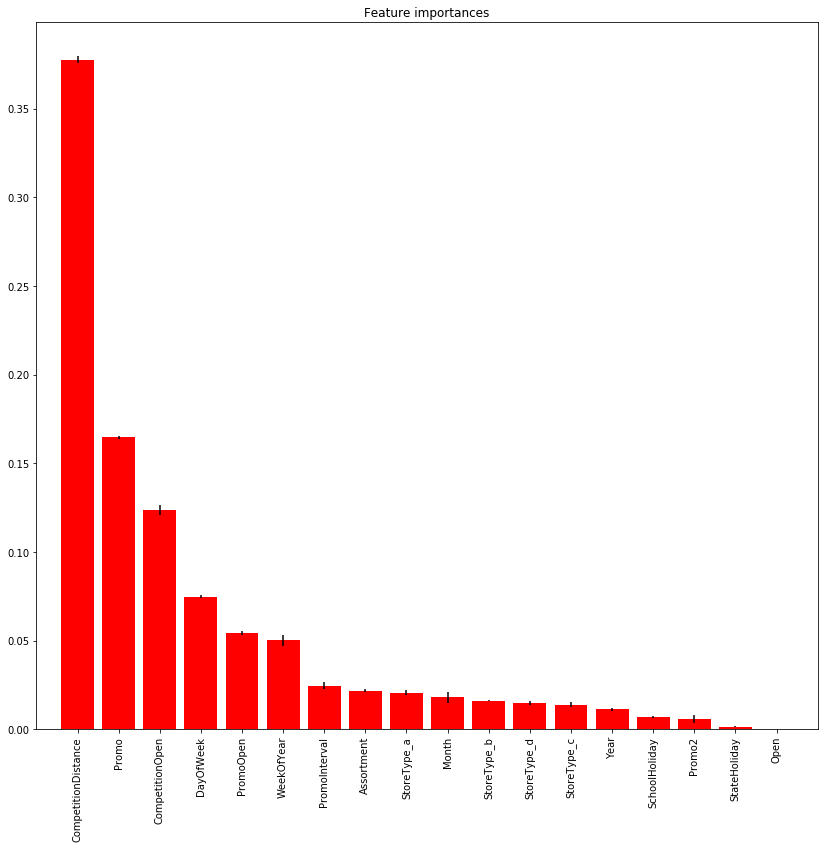

In [145]:
clf_rf_5 = RandomForestRegressor()      
clr_rf_5 = clf_rf_5.fit(X_WithSales,y_WithSales)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_WithSales.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_WithSales.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_WithSales.shape[1]), X_WithSales.columns[indices],rotation=90)
plt.xlim([-1, X_WithSales.shape[1]])
plt.show()